# Project 3 - Applied Statistics & Modeling
The data that is going to be used for this project has been normalised. This is why the values fall between 1-3.

### Loading in Packages

In [1]:
#Base packages that are going to be 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression

### Function Creation
When doing a project that may involve reusing lines of data it is best to create a function that can be reused. This improves readability and decreases the reptitive nature of the different data sets. It can also be useful to store these and use them at a later date

In [2]:
#Create a function that is going to plot data 
#It is called time series because that is the type of data it is going to be primarily be dealing with
def time_series(xdata,ydata,title,xlabel,ylabel):
    plt.figure(figsize=(10,6))
    plt.plot(xdata,ydata)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [3]:
#Create a function that is going to make a bar chart
def bar_chart(xdata,ydata,title,xlabel,ylabel):
    plt.figure(figsize=(10,6))
    plt.bar(xdata,ydata)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [4]:
#Plot the seasonal values graph
#This is going to be used when looking at the different values of seasonality decomposition
#Majoriy of the data is going to use Monday-Sunday as the x ticks, that is what xticks_list is asking for
def seasonal_values_plot(xdata,ydata,title,xlabel,ylabel,xticks_list):
    plt.figure(figsize=(12,6))
    plt.plot(xdata,ydata)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(xticks_list)
    plt.xticks(rotation=45)

In [5]:
#Create a seasonal decomposition of the different parts that make up the data
#Creating a subplot where the values are stacked up on one another makes it easier to read

def plot_seasonal_decomposition(data, period):
    """
    Function to plot the seasonal decomposition of a time series.

    Parameters:
    - data: Pandas Series or DataFrame with a datetime index.
    - freq: Frequency of the seasonal component (e.g., 'D' for daily, 'M' for monthly).

    Returns:
    - None (plots the decomposition).
    """
    decomposition = seasonal_decompose(data, period=period)

    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(data, label='Original')
    plt.legend()

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend()

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend()

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [6]:
#Create a rolling mean of the data to understand the trend
#This also incudes the standard deviation to understand the variance in data values

def roll_mean_std_dev(df_column,window):

    plt.figure(figsize=(10,6))
    #Look at the mean and the standard deviation of this data
    rolmean = df_column.rolling(window).mean()
    rolstd = df_column.rolling(window).std()

    #Let's check the stationarity of the graph
    #Plot the rolling statistics
    orig = plt.plot(df_column,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [7]:
#When given a list of daily values it may be useful to break it up into weeks as rows and days as columns
#This is going to help be able to break up the data and perform statistical analysis
def create_weekly_data(df,value_column,incrementing_column):
    
    #Create the list of days as the column names
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    #Make a copy
    original_copy = df.copy()
    original_copy['Incrementing Day'] = range(0, len(original_copy))
    original_copy.set_index(incrementing_column,inplace=True)

    #Determine the number of weeks by adding 6 to the length so that partial weeks are counted
    num_weeks = (len(df)+6) // 7

    #Create a new datadrame where the index is the number of weeks and the columns are the days of the week
    weekly_data = pd.DataFrame(index=range(num_weeks),columns=days_of_week)

    #Fill the empty dataframe with data
    for i, row in original_copy.iterrows():
        week = i // 7
        day = days_of_week[i % 7]
        weekly_data.at[week, day] = row[value_column]

    return weekly_data

In [8]:
#When given a list of daily values which do not include weekend values such as stock data 
#it can be useful to break it up into weeks as rows and days as columns
#This can break up the data to perform statistical analysis

def create_week_day_data(df,value_column,incrementing_column):
    
    #Create the list of days as the column names
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

    #Make a copy
    original_copy = df.copy()
    original_copy['Incrementing Day'] = range(0, len(original_copy))
    original_copy.set_index(incrementing_column,inplace=True)

    #Determine the number of weeks by adding 6 to the length so that partial weeks are counted
    num_weeks = (len(df)+4) // 5

    #Create a new datadrame where the index is the number of weeks and the columns are the days of the week
    weekly_data = pd.DataFrame(index=range(num_weeks),columns=days_of_week)

    #Fill the empty dataframe with data
    for i, row in original_copy.iterrows():
        week = i // 5
        day = days_of_week[i % 5]
        weekly_data.at[week, day] = row[value_column]

    return weekly_data

In [9]:
#Plot the seasonal values that make up the decomposition
def seasonal_values_plot(decomposed_data_seasonal,lag_length,y_column,title,xlabel,period_list,ylabel):
    seasonal_data = pd.DataFrame(decomposed_data_seasonal[0:lag_length])
    plt.figure(figsize=(12,6))
    plt.plot(seasonal_data.index,seasonal_data[y_column])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(seasonal_data.index,period_list)
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)

In [10]:
#Find statistical information and add it onto the dataframe
#This is used for weekly data (Monday-Sunday)
def mean_median_variance_std_weekly(data, columns):

    num_weeks = len(data)

    data['Weekly Mean'] = data.sum(axis=1)/7
    data['Weekly Median'] = data[columns].median(axis=1)
    data['Standard Deviation'] = data[columns].std(axis=1)
    data['Variance'] = data[columns].var(axis=1)

    data.loc['Mean'] = data.mean()
    data.loc['Median'] = data.median()
    data.loc['Variance'] = data.var()
    data.loc['Standard Deviation'] = data.std()

    rows_to_select = slice(num_weeks,len(data))
    columns_to_select = slice(7,11)
    data.iloc[rows_to_select,columns_to_select] = pd.np.nan

    return data

In [11]:
#Find statistical information and add it onto the dataframe
#This is used for week-day data (Monday-Friday)
def mean_median_variance_std_week_day(data, columns):

    num_weeks = len(data)

    data['Weekly Mean'] = data.sum(axis=1)/5
    data['Weekly Median'] = data[columns].median(axis=1)
    data['Standard Deviation'] = data[columns].std(axis=1)
    data['Variance'] = data[columns].var(axis=1)

    data.loc['Mean'] = data.mean()
    data.loc['Median'] = data.median()
    data.loc['Variance'] = data.var()
    data.loc['Standard Deviation'] = data.std()

    rows_to_select = slice(num_weeks,len(data))
    columns_to_select = slice(5,9)
    data.iloc[rows_to_select,columns_to_select] = pd.np.nan

    return data

In [12]:
#Create a least squares line going through the data values

def plot_least_squares_line(x_value, y_value, title, x_label, y_label):
    plt.figure(figsize=(10,6))
    # Extracting x and y values from the dataframe
    x = x_value.values.reshape(-1, 1).astype(float)
    y = y_value.astype(float)

    # Fitting the linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Predicting y values using the model
    y_pred = model.predict(x)

    # Plotting the original data and the least squares line
    plt.scatter(x, y, label='original data', color='blue')
    plt.plot(x, y_pred, label='least squares', color='red')

    plt.legend()
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [13]:
import matplotlib.pyplot as plt

def create_boxplot_multiple_weeks(data, week_indices):
    fig, ax = plt.subplots(figsize=(10, 6))
    boxplot_data = [data.loc[idx] for idx in week_indices]
    ax.boxplot(boxplot_data, labels=week_indices)
    ax.set_title('Box Plot of Weekly Data')
    ax.set_xlabel('Week Index')
    ax.set_ylabel('Values')
    plt.show()


## Electricity Consumption
The consumption of electricity can be taken as daily or weekly recordings usually. As there is no distinct time interval that is given, some investigaiton is going to be done to decipher the best time interval to choose.

### Data exploration
- Load the Data: Begin by loading each dataset from the Excel file.

- Visualize the Data: Plot each time series to understand its trend, seasonality, and noise components.

In [14]:
#Import the different datasets from the excel sheet
electricity_consumption = pd.read_excel('time_series_mixed_order.xlsx',sheet_name='Electricity Consumption')

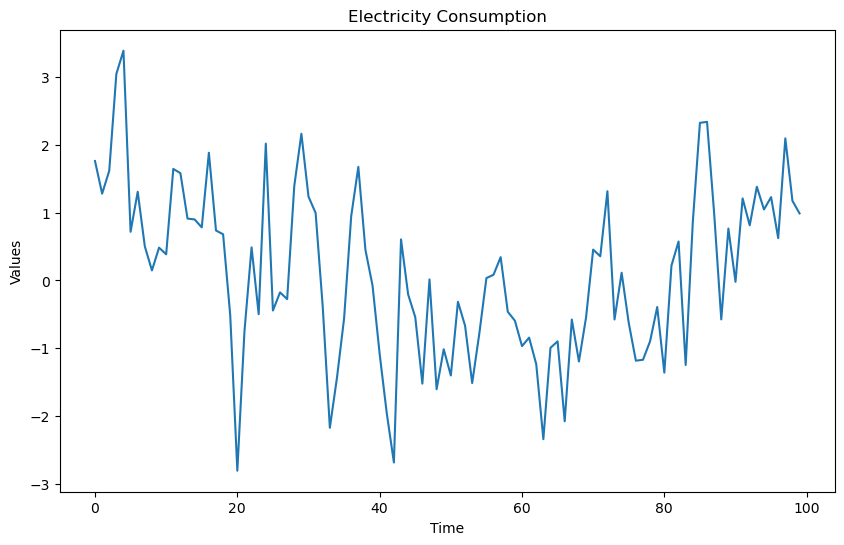

In [15]:
#Plot the time series
time_series(electricity_consumption.index,electricity_consumption['Electricity Consumption'],'Electricity Consumption','Time','Values')

In [16]:
#Preprocess electricity consumption data
#Create a new column called day that is going to be set as the index
#This is done so that the time series can have dates as the x columns
electricity_consumption['Day'] = pd.date_range('2024-01-01',periods=len(electricity_consumption))
electricity_consumption.drop(columns='Unnamed: 0',inplace=True)
electricity_consumption.set_index('Day',inplace=True)
electricity_consumption['Incrementing Day'] = range(1,len(electricity_consumption)+1)
electricity_consumption

,Electricity Consumption,Incrementing Day
Day,,
2024-01-01,1.764052,1
2024-01-02,1.282183,2
2024-01-03,1.619830,3
2024-01-04,3.050808,4
2024-01-05,3.392962,5
...,...,...
2024-04-05,1.230737,96
2024-04-06,0.625869,97
2024-04-07,2.098805,98


#### Time interval decision
As there is no given time in the data, it is up to us to decide what a reasonable guess would be for the interval. It is fair to instantly ignore the possibility of it being a yearly measurement as the amount of electricity that is consumed now would trump the amount consumed 100 years ago. So it is between a weekly and a monthly basis. I am going to decompose for a weekly basis and a monthly basis. Looking at the seasonality pattern should be able to represent real world situations. 

#### Daily recordings
This would assume that the electricity consumption is recorded for a given day and you would want a seasonality based on the week (7). Look at the seasonality pattern and see if it makes sense

In [17]:
#Weekly electricity consumption decomposition graphs saved as variables
weekly_electricity_consumption_decomposition = seasonal_decompose(electricity_consumption['Electricity Consumption'],period=7)
weekly_electricity_consumption_decomposition_trend = weekly_electricity_consumption_decomposition.trend
weekly_electricity_consumption_decomposition_seasonal = weekly_electricity_consumption_decomposition.seasonal
weekly_electricity_consumption_decomposition_residual = weekly_electricity_consumption_decomposition.resid

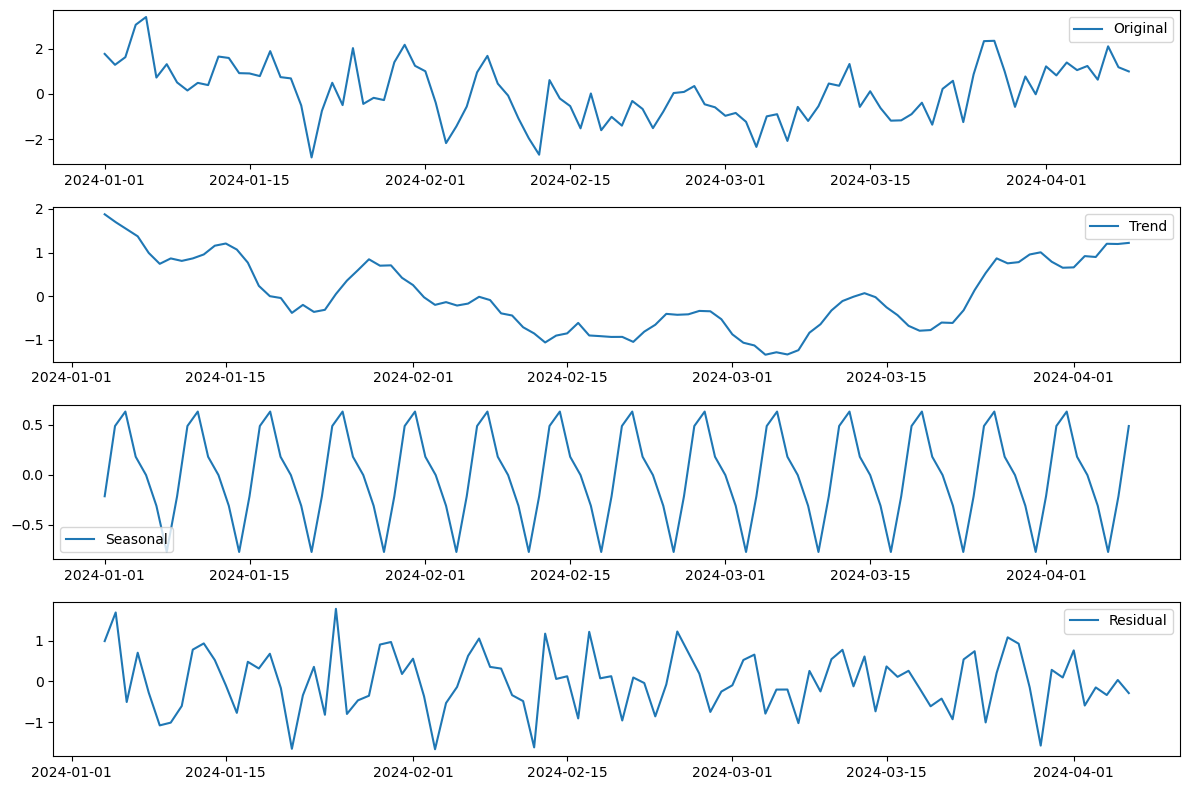

In [18]:
#Plot the electricity consumption seasonal decomposition
plot_seasonal_decomposition(electricity_consumption['Electricity Consumption'],7)

#### Weekly seasonality decomposition
Trend - There is no overall change in average values in the time series

Cycles - There is a downturn during the beginning of February which continues until the middle of March before returning to similar higher levels as seen at the start of the year. This could be due to the nicer weather that takes place during February and March that does not require A/C or a heater. Where as in January you might be using a heater to come the house warm while the AC might be turned as you head into April due to warmer temperatures.

Seasonality - There is a constant seasonality which has a period of peaks with a downturn which is going by a quick increase to the peak, which takes place within the weekly season

Residual - The residual as a constant mean around 0 with white noise

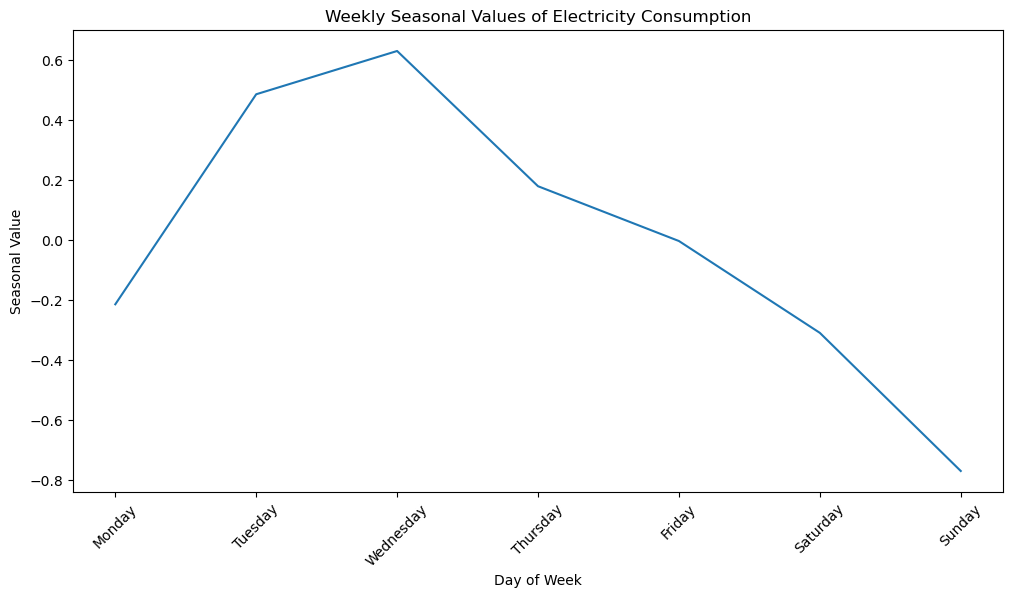

In [19]:
#plot the seasonal values on a graph so that you can understand which days have higher electricity consumed
days_column=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
seasonal_values_plot(weekly_electricity_consumption_decomposition_seasonal,7,'seasonal',
                     'Weekly Seasonal Values of Electricity Consumption','Day of Week',days_column,'Seasonal Value')

#### Weekly Seasonal Values
The seasonal values show a peak during the working week with drops on Saturday and Sunday. This might suggest that it represents some work place where the weekends have a much smaller number of people that are working and therefore the amount fo electricity that is used is going to be much smaller. Where as during the week the electricity is higher. This would make logical sense for the period to be week.

#### Monthly recordings
This would imply that the recordings occured at the end of each month. The seasonality would reflect how the values change from month to month. 


In [20]:
#Change the index of electricity consumption to months rather than day
electricity_consumption['Month'] = pd.date_range('2015-01-01',periods=len(electricity_consumption),freq='MS')
electricity_consumption.set_index('Month',inplace=True)
electricity_consumption

,Electricity Consumption,Incrementing Day
Month,,
2015-01-01,1.764052,1
2015-02-01,1.282183,2
2015-03-01,1.619830,3
2015-04-01,3.050808,4
2015-05-01,3.392962,5
...,...,...
2022-12-01,1.230737,96
2023-01-01,0.625869,97
2023-02-01,2.098805,98


In [21]:
#Monthly electricity consumption decomposition
monthly_electricity_consumption_decomposition = seasonal_decompose(electricity_consumption['Electricity Consumption'],period=12)
monthly_electricity_consumption_decomposition_trend = monthly_electricity_consumption_decomposition.trend
monthly_electricity_consumption_decomposition_seasonal = monthly_electricity_consumption_decomposition.seasonal
monthly_electricity_consumption_decomposition_residual = monthly_electricity_consumption_decomposition.resid

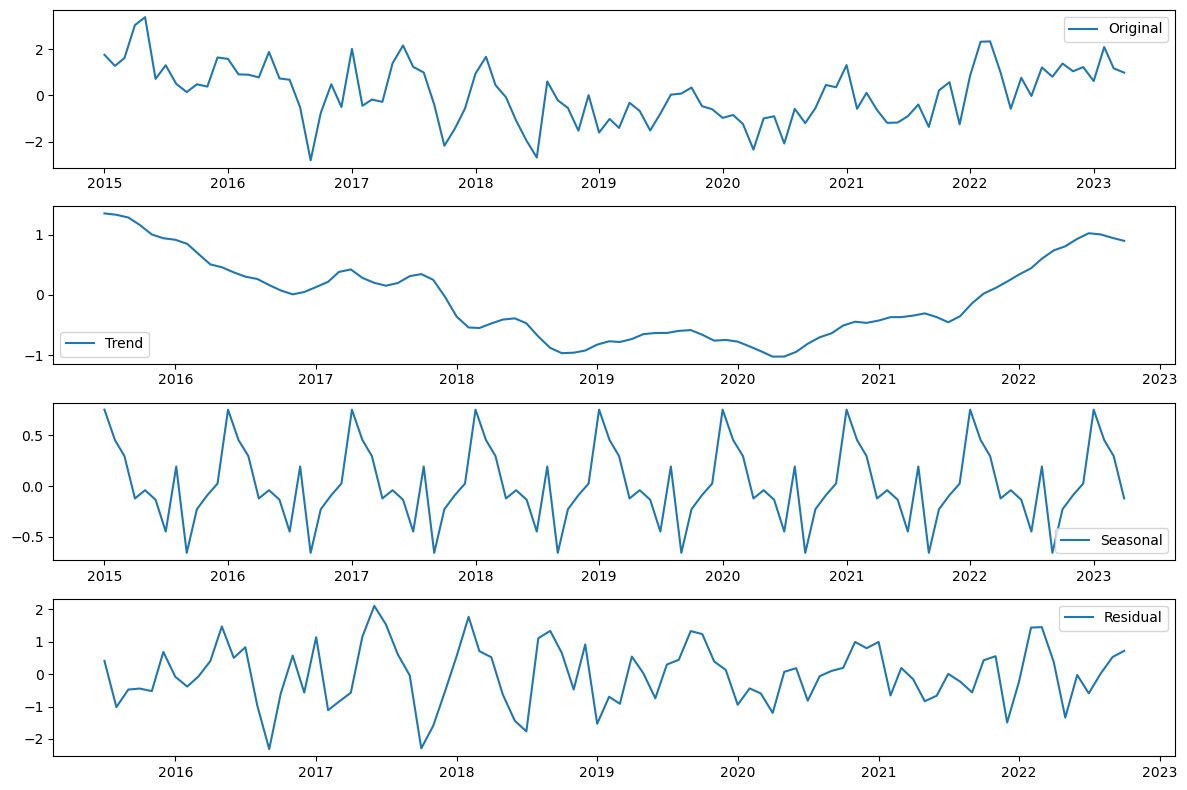

In [22]:
#Plot the electricity consumption which has a lag of 12 which would represent the months of the year
plot_seasonal_decomposition(electricity_consumption['Electricity Consumption'],12)

Monthly interval - This shows less of a consistient seasonal pattern and has spikes and dips. This would not reflect what would be expected when looking at monthly electricity consumption as it is assumed that there is a strong correlation with weather which changes more smoothly. 

Trend - There is no overall change in the average values in the time series.

Cycle - There is a cycle that takes place where there is a drop from 2018 to 2021 before 2022 and 2023 returns to values similar to 2016. This does not make a while lot of sense because it is assumed that the amount of electricity that was used during 2020 and 2021 would be far higher due to the Covid-19 Pandemic which took place due to the number of people that had to stay inside.

Seasonality - This seasonality does not follow as clear of a gradual change as it did with the weekly values

Residual - The residual values also seem to be larger

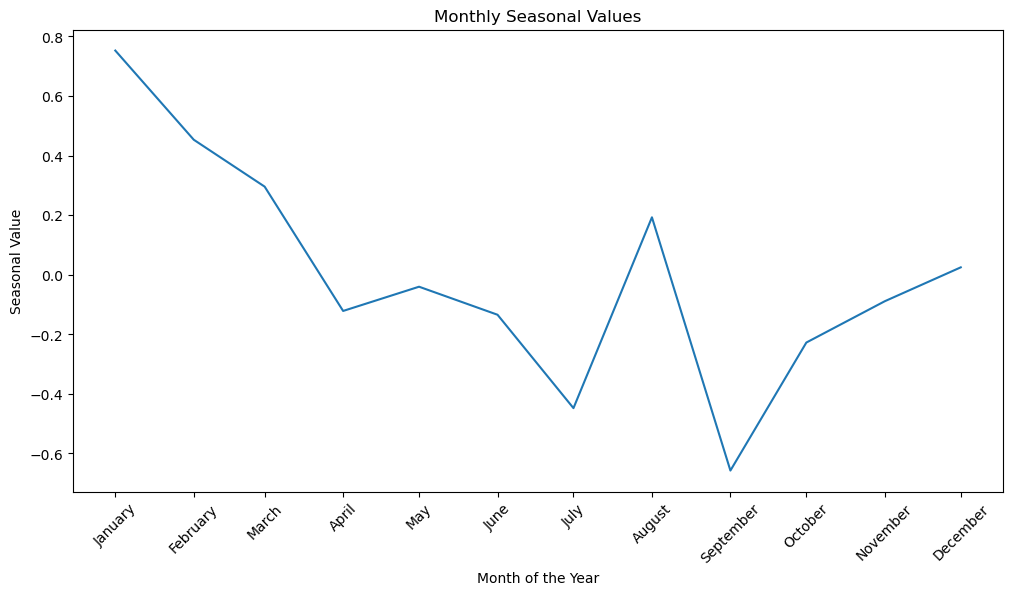

In [23]:
#Create the months of the year list
months_list = ['January','February','March','April','May','June','July','August','September','October','November','December']

#Plot the seasonal monthly values graph
seasonal_values_plot(monthly_electricity_consumption_decomposition_seasonal,12,'seasonal',
                     'Monthly Seasonal Values','Month of the Year',months_list,'Seasonal Value')

#### Monthly Seasonal Values
Using months as the seasonal value it shows that January is the peak with decreasing values to July until a sudden spike up in August before leveling out in October through December. This does not follow as clear of a pattern as it does with the weekly seasonal values. 

#### Mean Absolute Error
This value will give you the average distance that the residuals are from the line of zero. The most accurate seasonal decomposition has residuals of 0, so the residual with the smallest mean absolute error is going to reflect a more accurate depiction of the movement of the data. Comparing the weekly and the monthly should also give better insight into which is better to use for the time interval

In [24]:
#MAE for using the period as week
weekly_electricity_consumption_decomposition_residual.dropna(inplace=True)
zeros = np.zeros(len(weekly_electricity_consumption_decomposition_residual))
mean_absolute_error(zeros, weekly_electricity_consumption_decomposition_residual) 

0.5925758047097736

In [25]:
#MAE for using the period as month
monthly_electricity_consumption_decomposition_residual.dropna(inplace=True)
zeros_2 = np.zeros(len(monthly_electricity_consumption_decomposition_residual))
mean_absolute_error(zeros_2,monthly_electricity_consumption_decomposition_residual)

0.7489559703540682

#### Weekly or Monthly for time interval?
Weekly electricity is going to be the correct interval that is used for the time series due to the behavior of the seasonality, understanding of real world events and the lower mean absolute error.

### Preliminary Analysis
- Descriptive Statistics: Compute and interpret the mean, median, variance, and standard deviation for each dataset.

In [26]:
#Create a day column for electricity consumption and make that the index
#Remember that it was last used as month
electricity_consumption['Day'] = pd.date_range(start='2024-01-01', periods=len(electricity_consumption), freq='D')
electricity_consumption.set_index('Day',inplace=True)
electricity_consumption

,Electricity Consumption,Incrementing Day
Day,,
2024-01-01,1.764052,1
2024-01-02,1.282183,2
2024-01-03,1.619830,3
2024-01-04,3.050808,4
2024-01-05,3.392962,5
...,...,...
2024-04-05,1.230737,96
2024-04-06,0.625869,97
2024-04-07,2.098805,98


In [27]:
#Create a new dataframe that is in weekly data
#This is done so that you can look at the different statistical information easier
#You can look at these statistics based on their week and also on their day of the week
electricity_consumption_weekly = create_weekly_data(electricity_consumption,'Electricity Consumption','Incrementing Day')
electricity_consumption_weekly

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1.764052,1.282183,1.61983,3.050808,3.392962,0.719203,1.30969
1,0.503488,0.148525,0.484861,0.386474,1.647511,1.584793,0.914072
2,0.900899,0.784124,1.886141,0.737912,0.682024,-0.513084,-2.809532
3,-0.751147,0.488863,-0.497734,2.020888,-0.443922,-0.176202,-0.275285
4,1.395137,2.166927,1.238411,0.997368,-0.389102,-2.175347,-1.435586
5,-0.561444,0.949569,1.677164,0.451255,-0.076675,-1.086891,-1.963463
6,-2.688002,0.606775,-0.206265,-0.541207,-1.523399,0.015791,-1.606002
7,-1.015741,-1.403337,-0.314766,-0.668188,-1.514726,-0.785545,0.035559
8,0.084297,0.34462,-0.462012,-0.593747,-0.969334,-0.84422,-1.235256
9,-2.343911,-0.994529,-0.899046,-2.079721,-0.577078,-1.195838,-0.545973


#### Filling missing values
You can see that there are missing values which need to be replaced before statistical analysis. Finding the mean of the values from weeks 1-14 is going to make it so that you can do a more accurate statistical analysis.

In [28]:
#Find the average from weeks 1-14 and then replace na with those values
week_14_mean_value_wed = electricity_consumption_weekly.iloc[0:14]['Wednesday'].mean()
electricity_consumption_weekly.loc[14,'Wednesday'] = week_14_mean_value_wed

week_14_mean_value_thur = electricity_consumption_weekly.iloc[0:14]['Thursday'].mean()
electricity_consumption_weekly.loc[14,'Thursday'] = week_14_mean_value_thur

week_14_mean_value_fri = electricity_consumption_weekly.iloc[0:14]['Friday'].mean()
electricity_consumption_weekly.loc[14,'Friday'] = week_14_mean_value_fri

week_14_mean_value_sat = electricity_consumption_weekly.iloc[0:14]['Saturday'].mean()
electricity_consumption_weekly.loc[14,'Saturday'] = week_14_mean_value_sat

week_14_mean_value_sun = electricity_consumption_weekly.iloc[0:14]['Sunday'].mean()
electricity_consumption_weekly.loc[14,'Sunday'] = week_14_mean_value_sun

electricity_consumption_weekly

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1.764052,1.282183,1.61983,3.050808,3.392962,0.719203,1.30969
1,0.503488,0.148525,0.484861,0.386474,1.647511,1.584793,0.914072
2,0.900899,0.784124,1.886141,0.737912,0.682024,-0.513084,-2.809532
3,-0.751147,0.488863,-0.497734,2.020888,-0.443922,-0.176202,-0.275285
4,1.395137,2.166927,1.238411,0.997368,-0.389102,-2.175347,-1.435586
5,-0.561444,0.949569,1.677164,0.451255,-0.076675,-1.086891,-1.963463
6,-2.688002,0.606775,-0.206265,-0.541207,-1.523399,0.015791,-1.606002
7,-1.015741,-1.403337,-0.314766,-0.668188,-1.514726,-0.785545,0.035559
8,0.084297,0.34462,-0.462012,-0.593747,-0.969334,-0.84422,-1.235256
9,-2.343911,-0.994529,-0.899046,-2.079721,-0.577078,-1.195838,-0.545973


#### Finding mean, standard deviation, median and variance

In [29]:
electricity_consumption_weekly

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1.764052,1.282183,1.61983,3.050808,3.392962,0.719203,1.30969
1,0.503488,0.148525,0.484861,0.386474,1.647511,1.584793,0.914072
2,0.900899,0.784124,1.886141,0.737912,0.682024,-0.513084,-2.809532
3,-0.751147,0.488863,-0.497734,2.020888,-0.443922,-0.176202,-0.275285
4,1.395137,2.166927,1.238411,0.997368,-0.389102,-2.175347,-1.435586
5,-0.561444,0.949569,1.677164,0.451255,-0.076675,-1.086891,-1.963463
6,-2.688002,0.606775,-0.206265,-0.541207,-1.523399,0.015791,-1.606002
7,-1.015741,-1.403337,-0.314766,-0.668188,-1.514726,-0.785545,0.035559
8,0.084297,0.34462,-0.462012,-0.593747,-0.969334,-0.84422,-1.235256
9,-2.343911,-0.994529,-0.899046,-2.079721,-0.577078,-1.195838,-0.545973


In [30]:
#Create mean, median, std and variance for days of week and each week
electricity_consumption_statistics = mean_median_variance_std_weekly(electricity_consumption_weekly,days_column)
electricity_consumption_statistics

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_85752/3543321098.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data.iloc[rows_to_select,columns_to_select] = pd.np.nan


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Weekly Mean,Weekly Median,Standard Deviation,Variance
0,1.764052,1.282183,1.61983,3.050808,3.392962,0.719203,1.30969,1.876961,1.619830,0.980731,0.961833
1,0.503488,0.148525,0.484861,0.386474,1.647511,1.584793,0.914072,0.809960,0.503488,0.595700,0.354858
2,0.900899,0.784124,1.886141,0.737912,0.682024,-0.513084,-2.809532,0.238355,0.737912,1.513974,2.292117
3,-0.751147,0.488863,-0.497734,2.020888,-0.443922,-0.176202,-0.275285,0.052209,-0.275285,0.950417,0.903292
4,1.395137,2.166927,1.238411,0.997368,-0.389102,-2.175347,-1.435586,0.256830,0.997368,1.615193,2.608849
5,-0.561444,0.949569,1.677164,0.451255,-0.076675,-1.086891,-1.963463,-0.087212,-0.076675,1.239796,1.537095
6,-2.688002,0.606775,-0.206265,-0.541207,-1.523399,0.015791,-1.606002,-0.848901,-0.541207,1.139063,1.297464
7,-1.015741,-1.403337,-0.314766,-0.668188,-1.514726,-0.785545,0.035559,-0.809535,-0.785545,0.558562,0.311992
8,0.084297,0.34462,-0.462012,-0.593747,-0.969334,-0.84422,-1.235256,-0.525093,-0.593747,0.568620,0.323329
9,-2.343911,-0.994529,-0.899046,-2.079721,-0.577078,-1.195838,-0.545973,-1.233728,-0.994529,0.709820,0.503845


The dataframe above includes the mean, median, variance and standard deviation for the days of the week and the for the incrementing weeks. This allows for two different types of understanding. The daily values gives an idea of what seasonality takes place on certain days while the weekly values helps understand the trend of the data. Looking at the overall trend is more important for this data so that is what is going to be looked at in the section below.

#### Weekly Mean

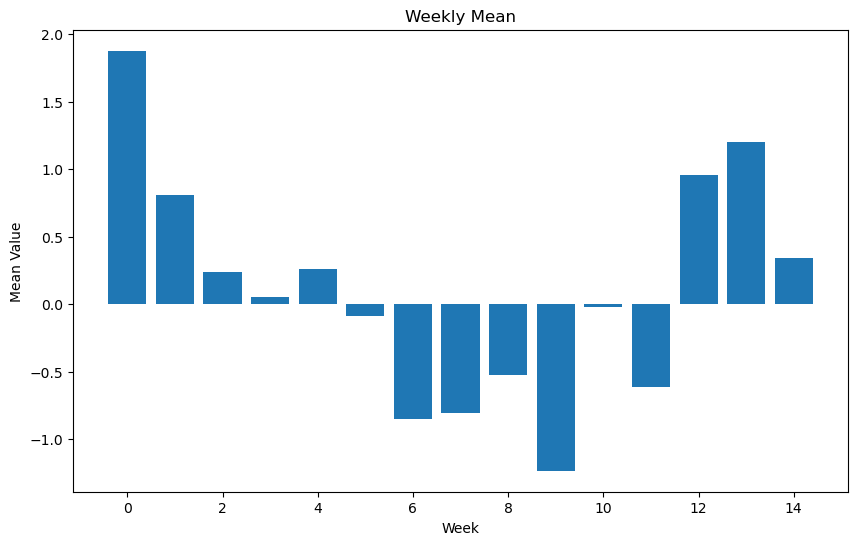

In [31]:
#Create a bar chart of the mean of the values of weeks 1-15
bar_chart(electricity_consumption_statistics.index[0:15],electricity_consumption_statistics['Weekly Mean'][0:15],'Weekly Mean','Week','Mean Value')

There is a clear pattern that is similar to the trend that is observed for the trend of electricity consumption data. Earlier weeks and later weeks show an increase in amount of electricity used while there is a smaller amount of electricity that is used around the middle portion of the data.

#### Weekly Median

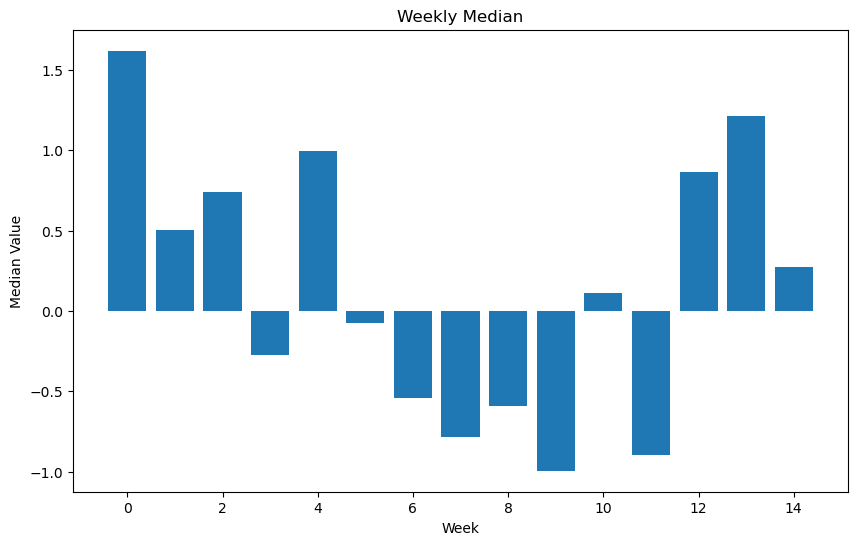

In [32]:
#Create a bar chart of the weekly median of weeks 1-15
bar_chart(electricity_consumption_statistics.index[0:15],electricity_consumption_statistics['Weekly Median'][0:15],'Weekly Median','Week','Median Value')

The mean and the median seem to follow a simialr trend where the initial and end of the data is positive while the middle is negative. However there are certain weeks which have far different mean values vs median, such as week 4 which has a much higher median than the mean while implies that the variance is higher.

#### Weekly Variance

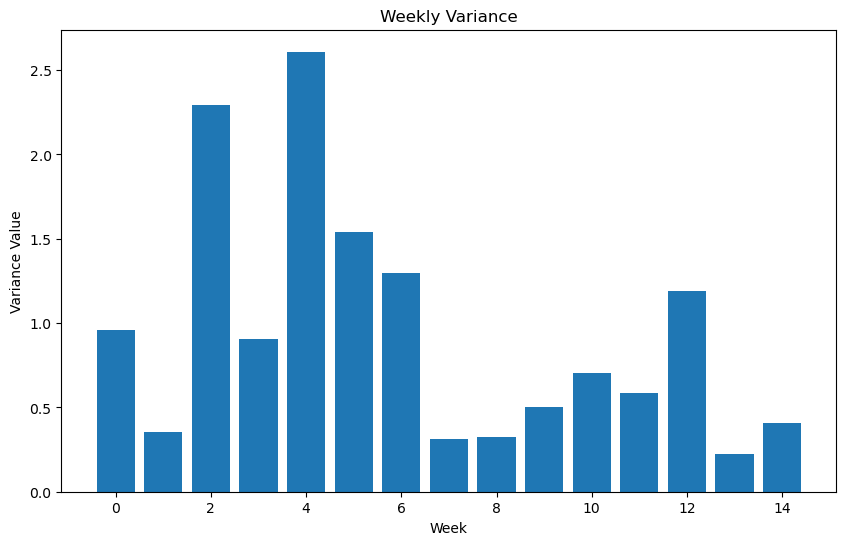

In [33]:
#Plot the bar chart for variance of the values (daily values) from weeks 1-15
bar_chart(electricity_consumption_statistics.index[0:15],electricity_consumption_statistics['Variance'][0:15],'Weekly Variance','Week','Variance Value')

The variance has a positively skewed distribution. This means that if you were to look at the values across the weeks, the values in the earlier weeks have more oscillations in their values. This can be observed by looking at the residuals from the seasonal decomposition.

#### Weekly Standard Deviation

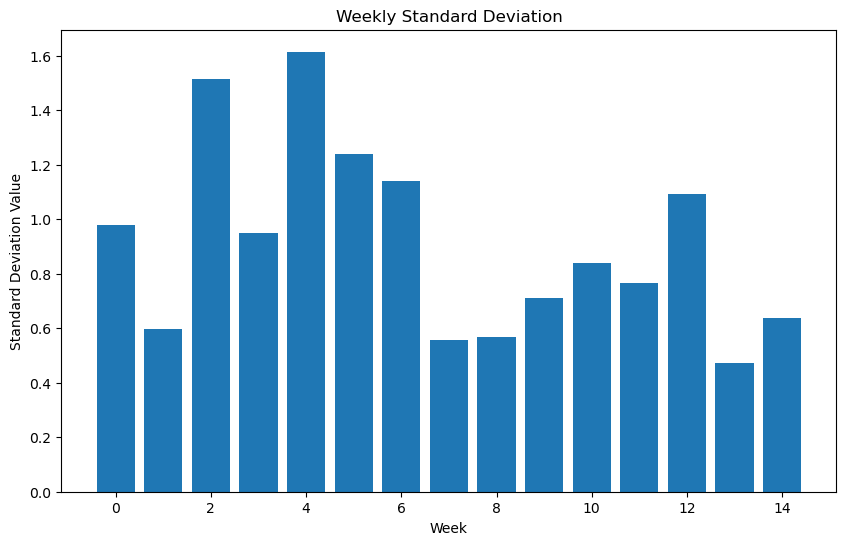

In [34]:
#Plot the standard deviation of the values (daily values) from weeks 1-15
bar_chart(electricity_consumption_statistics.index[0:15],electricity_consumption_statistics['Standard Deviation'][0:15],'Weekly Standard Deviation','Week','Standard Deviation Value')

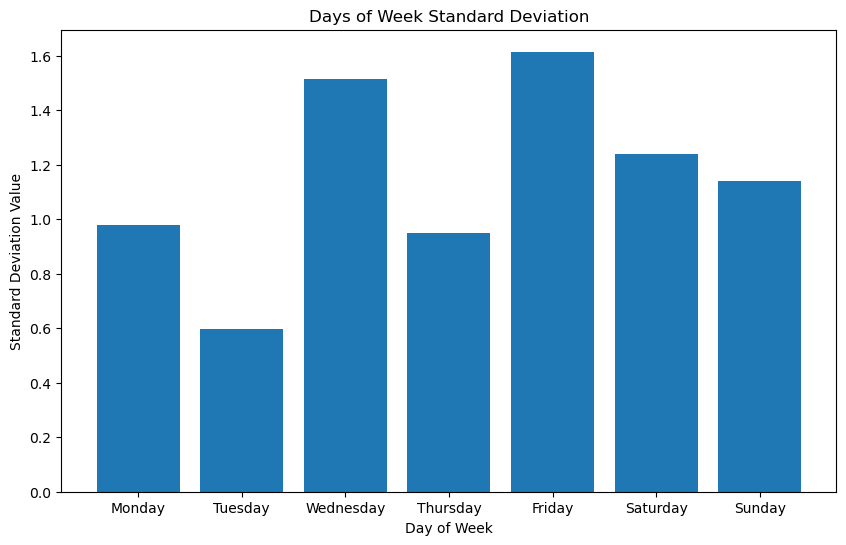

In [35]:
bar_chart(days_column ,electricity_consumption_statistics['Standard Deviation'][0:7],'Days of Week Standard Deviation','Day of Week','Standard Deviation Value')

Standard deviation further proves that there is no clear pattern as the difference between higher and smaller values is flattened out. Standard deviation is preferred as it is experessed in the same units as the original data. 

### Model Identification
- ACF and PACF Plots: Generate Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for each dataset to identify potential AR and MA components.

- Model Fitting: Fit different ARIMA models based on the insights from ACF and PACF plots and use criteria like AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) to select the best model.

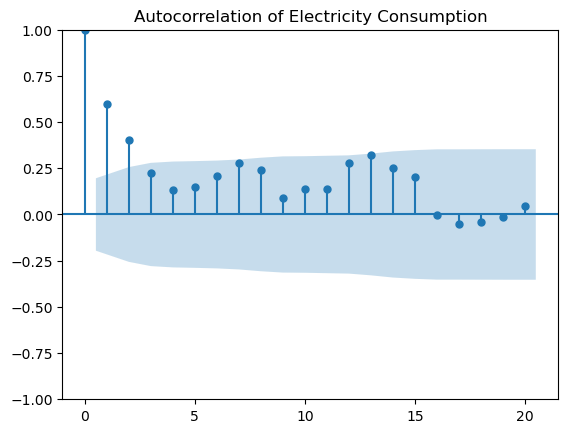

In [36]:
#Plot the ACF values
acf_values = plot_acf(electricity_consumption['Electricity Consumption'],lags=20,title='Autocorrelation of Electricity Consumption')

The blue shaded area is meant to represent the signifigance of the auto correlation. It is clear that the lagged difference gets quite small quickly but shows signs of recovering around day 7 and day 13/14 which represents how there is a correlation between the days of the week.

/Users/ben_nicholson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


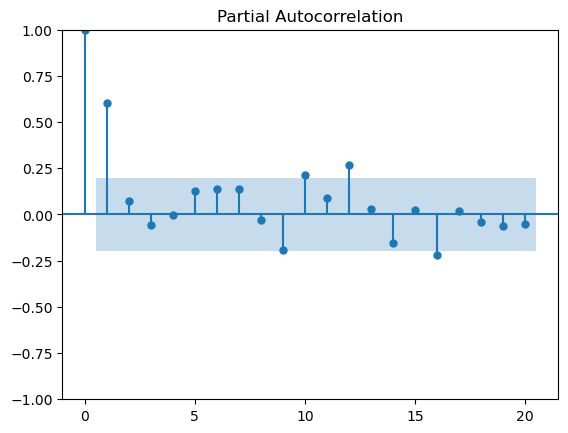

In [37]:
#Plot the PACF values
pacf_values = plot_pacf(electricity_consumption['Electricity Consumption'],lags=20)

Observe that there is not the same higher correlation around 7 but around 14 there is. 

## Stock Prices

### Data Exploration

In [38]:
#Load in the stock prices dataset
stock_prices = pd.read_excel('time_series_mixed_order.xlsx',sheet_name='Stock Prices')
stock_prices

,Unnamed: 0,Daily Stock Prices
0,0,1.883151
1,1,-0.406184
2,2,-1.944365
3,3,0.334154
4,4,-0.688425
...,...,...
95,95,0.090092
96,96,0.686017
97,97,1.209399
98,98,2.574988


In [39]:
#Preprocess stock prices
#Remove the unnecessary column and create a datetime series which will be in the index
stock_prices['Day'] = pd.date_range('2024-01-01',periods=len(stock_prices))
stock_prices.drop(columns='Unnamed: 0',inplace=True)
stock_prices.set_index('Day',inplace=True)
stock_prices

,Daily Stock Prices
Day,
2024-01-01,1.883151
2024-01-02,-0.406184
2024-01-03,-1.944365
2024-01-04,0.334154
2024-01-05,-0.688425
...,...
2024-04-05,0.090092
2024-04-06,0.686017
2024-04-07,1.209399


In [40]:
#Add incrementing day count to stock prices dataframe
stock_prices['Incrementing Day'] = range(1, len(stock_prices)+1)
stock_prices

,Daily Stock Prices,Incrementing Day
Day,,
2024-01-01,1.883151,1
2024-01-02,-0.406184,2
2024-01-03,-1.944365,3
2024-01-04,0.334154,4
2024-01-05,-0.688425,5
...,...,...
2024-04-05,0.090092,96
2024-04-06,0.686017,97
2024-04-07,1.209399,98


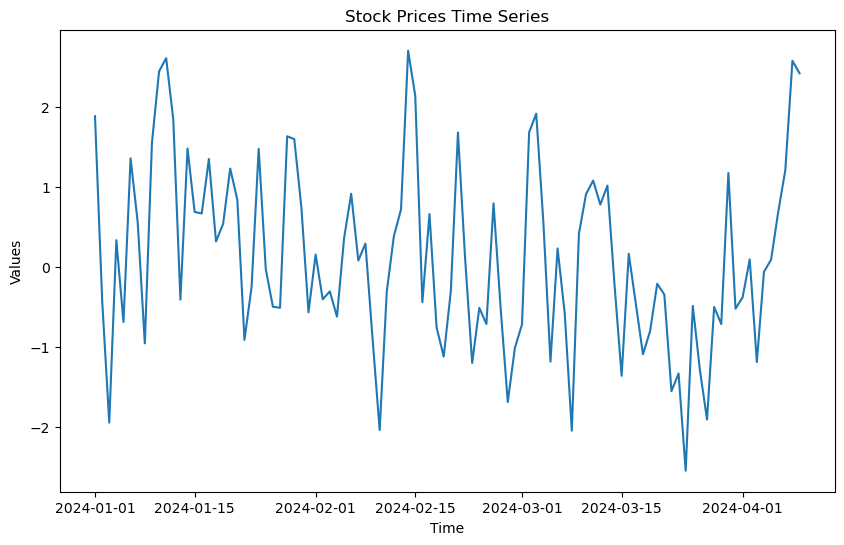

In [41]:
#Plot the time series
time_series(stock_prices.index,stock_prices['Daily Stock Prices'],'Stock Prices Time Series','Time','Values')

#### Time Interval Decision
Stock prices are recorded always as daily. There is another factor in that weekend dates are usually not recorded so the lag is going to be 5. This is assuming that the weekend values have not been recorded as there are no NA values.

In [42]:
#Weekly stock series decomposition graphs saved as variables
weekly_stock_prices_decomposition = seasonal_decompose(stock_prices['Daily Stock Prices'],period=5)
weekly_stock_prices_decomposition_trend = weekly_stock_prices_decomposition.trend
weekly_stock_prices_decomposition_seasonal = weekly_stock_prices_decomposition.seasonal
weekly_stock_prices_decomposition_residual = weekly_stock_prices_decomposition.resid

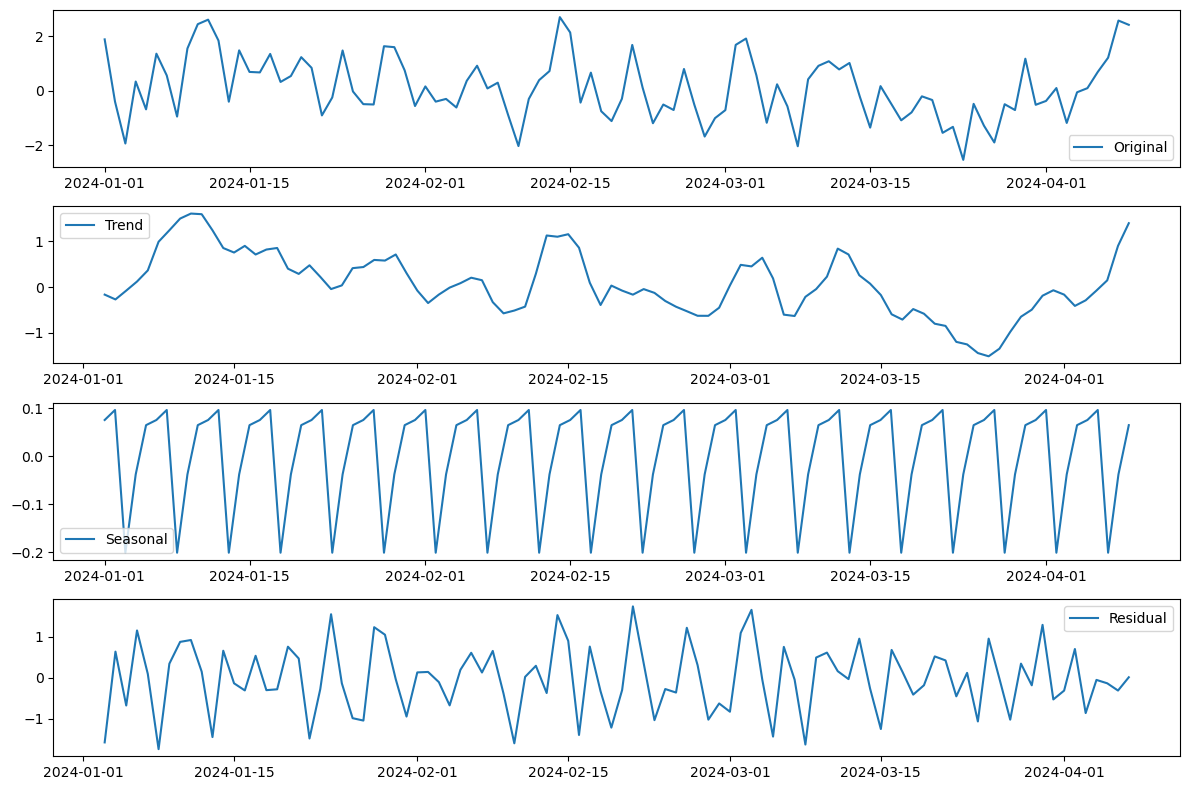

In [43]:
#Plot the stock prices seasonal decomposition
plot_seasonal_decomposition(stock_prices['Daily Stock Prices'],5)

#### Weekly seasonality decomposition
Trend - There seems to be some decreasing line, this can be explored with a line of best fit

Cycles - There are some periods of increases but nothing that is worth noticing.

Seasonality - It shows that there are values that are higher with one value that shrinks downwards to a much smaller value. However the seasonality values are quite small at -0.2 and +0.1.

Residual - The residual value has a mean around 0 with white noise fluctuations

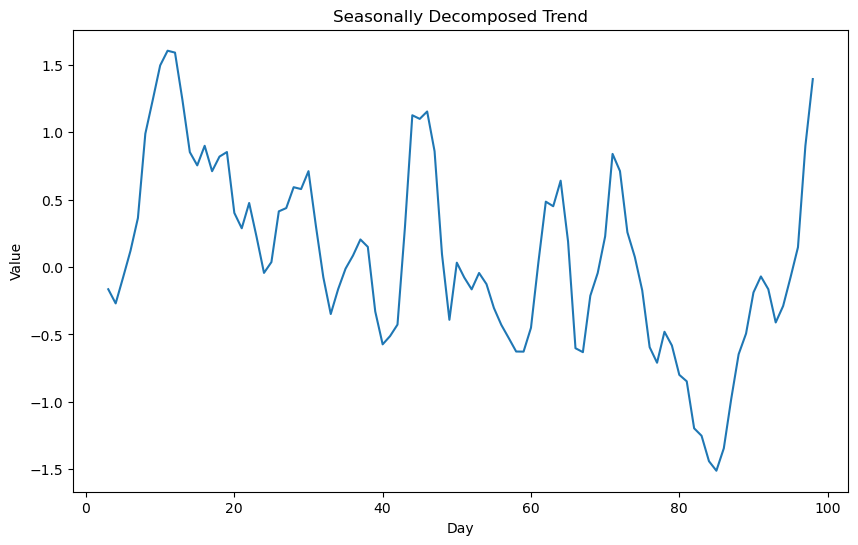

In [44]:
#Plot the line of best fit through the trend to see the downards trend
time_series(stock_prices['Incrementing Day'],weekly_stock_prices_decomposition_trend,'Seasonally Decomposed Trend','Day','Value')

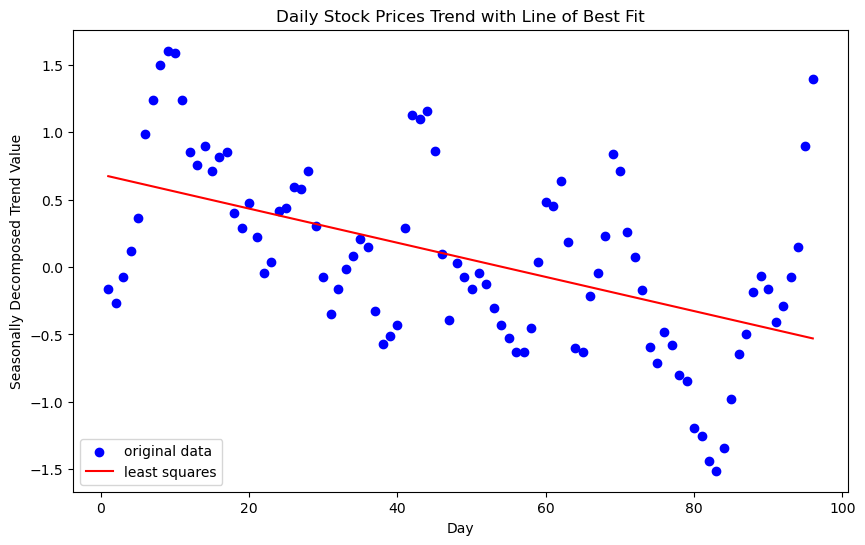

In [45]:
#Plot line of best fit against trend data
weekly_stock_prices_decomposition_trend.dropna(inplace=True)
plot_least_squares_line(stock_prices['Incrementing Day'][0:96],weekly_stock_prices_decomposition_trend,'Daily Stock Prices Trend with Line of Best Fit','Day','Seasonally Decomposed Trend Value')

#### Line of Best Fit of Trend after Decomposition
There is a clear decreasing trend, after the decomposition has taken place, this is suggesting that the stock price is decreasing overtime

Text(0, 0.5, 'Daily Stock Value')

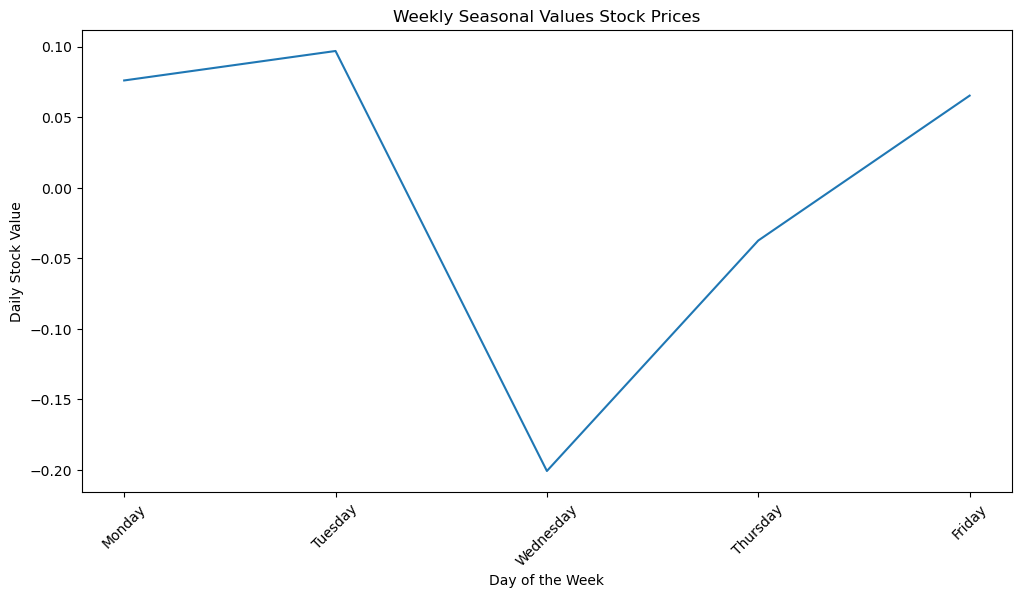

In [46]:
weekly_stock_prices_seasonal = pd.DataFrame(weekly_stock_prices_decomposition_seasonal[0:5])
plt.figure(figsize=(12,6))
plt.plot(weekly_stock_prices_seasonal.index,weekly_stock_prices_seasonal['seasonal'])
plt.title('Weekly Seasonal Values Stock Prices')
plt.xlabel('Day of the Week')
plt.xticks(weekly_stock_prices_seasonal.index,['Monday', 'Tuesday','Wednesday','Thursday','Friday'])
plt.xticks(rotation=45)
plt.ylabel('Daily Stock Value')

#### Seasonal Values of Stock Prices
Stock prices remain relatively constant a part from the dip that takes place on Wednesdays

### Preliminary Analysis

In [47]:
#Create a new dataframe that looks at the week day
stock_prices_weekly = create_week_day_data(electricity_consumption,'Electricity Consumption','Incrementing Day')
stock_prices_weekly

,Monday,Tuesday,Wednesday,Thursday,Friday
0,1.764052,1.282183,1.61983,3.050808,3.392962
1,0.719203,1.30969,0.503488,0.148525,0.484861
2,0.386474,1.647511,1.584793,0.914072,0.900899
3,0.784124,1.886141,0.737912,0.682024,-0.513084
4,-2.809532,-0.751147,0.488863,-0.497734,2.020888
5,-0.443922,-0.176202,-0.275285,1.395137,2.166927
6,1.238411,0.997368,-0.389102,-2.175347,-1.435586
7,-0.561444,0.949569,1.677164,0.451255,-0.076675
8,-1.086891,-1.963463,-2.688002,0.606775,-0.206265
9,-0.541207,-1.523399,0.015791,-1.606002,-1.015741


In [48]:
#Create mean, median, std and variance for days of week and each week
day_of_week_column = ['Monday','Tuesday','Wednesday','Thursday','Friday']
stock_prices_statistics = mean_median_variance_std_week_day(stock_prices_weekly,day_of_week_column)
stock_prices_statistics

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_85752/802255222.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data.iloc[rows_to_select,columns_to_select] = pd.np.nan


,Monday,Tuesday,Wednesday,Thursday,Friday,Weekly Mean,Weekly Median,Standard Deviation,Variance
0,1.764052,1.282183,1.61983,3.050808,3.392962,2.221967,1.764052,0.937237,0.878414
1,0.719203,1.30969,0.503488,0.148525,0.484861,0.633153,0.503488,0.429760,0.184694
2,0.386474,1.647511,1.584793,0.914072,0.900899,1.086750,0.914072,0.528499,0.279311
3,0.784124,1.886141,0.737912,0.682024,-0.513084,0.715423,0.737912,0.849434,0.721538
4,-2.809532,-0.751147,0.488863,-0.497734,2.020888,-0.309732,-0.497734,1.771210,3.137183
5,-0.443922,-0.176202,-0.275285,1.395137,2.166927,0.533331,-0.176202,1.175124,1.380916
6,1.238411,0.997368,-0.389102,-2.175347,-1.435586,-0.352851,-0.389102,1.487475,2.212582
7,-0.561444,0.949569,1.677164,0.451255,-0.076675,0.487974,0.451255,0.873026,0.762174
8,-1.086891,-1.963463,-2.688002,0.606775,-0.206265,-1.067569,-1.086891,1.320424,1.743518
9,-0.541207,-1.523399,0.015791,-1.606002,-1.015741,-0.934112,-1.015741,0.682285,0.465512


The dataframe shows 19 weeks of Monday-Friday values. It follows the same format as per electricity consumption. Further analysis of the statistical data can be done to better understand. Again looking at mean, median, variance and standard deviation for the days of the week can be useful but understanding the overall data is going to be best to look at the incremental weeks.

#### Weekly Mean Value of Stock Prices

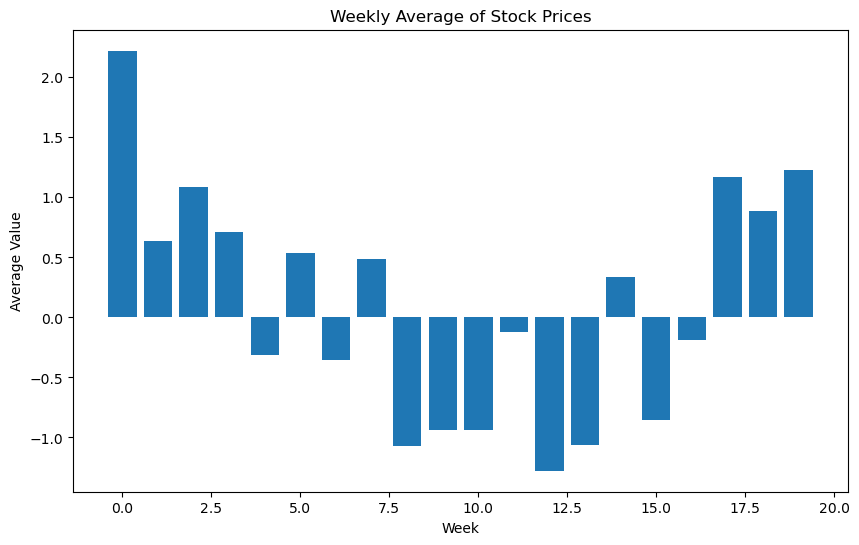

In [49]:
#Create the bar chart for weekly average of stock prices
bar_chart(stock_prices_statistics.index[0:20],stock_prices_statistics['Weekly Mean'][0:20],'Weekly Average of Stock Prices','Week','Average Value')

Similar to electricity consumption, this follows a similar trend to the line chart that is plot. As time goes on there is a movement from higher values to lower values before a sharp spike at the end of the data. However, this does prove that the dereasing trend can be observed by looking at average values and is not just the result of large fluctuations.

#### Weekly Median of Stock Prices

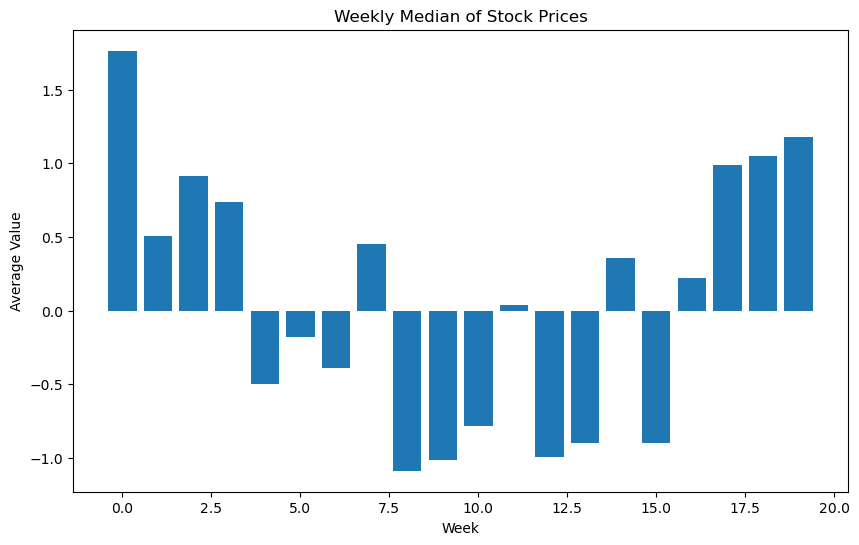

In [50]:
#Create the bar chart for median value of stock prices
bar_chart(stock_prices_statistics.index[0:20],stock_prices_statistics['Weekly Median'][0:20],'Weekly Median of Stock Prices','Week','Average Value')

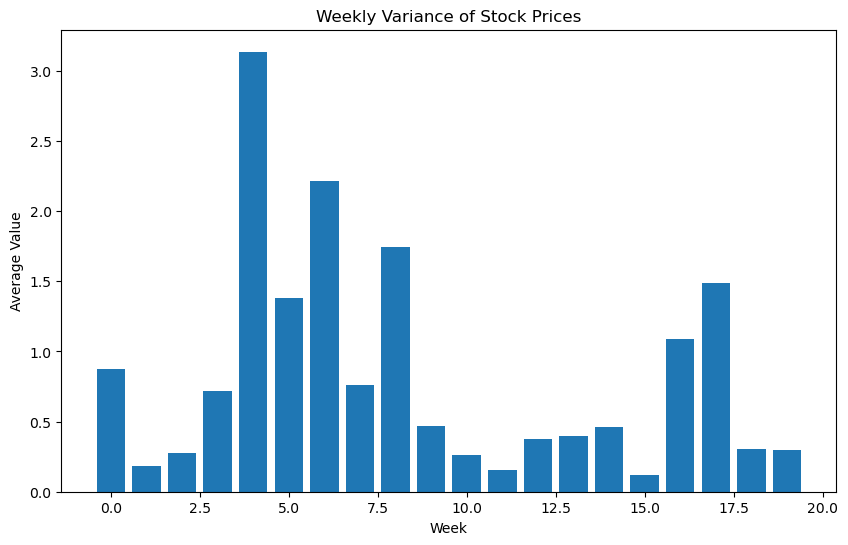

In [51]:
#Create the bar chart for variance of stock prices
bar_chart(stock_prices_statistics.index[0:20],stock_prices_statistics['Variance'][0:20],'Weekly Variance of Stock Prices','Week','Average Value')

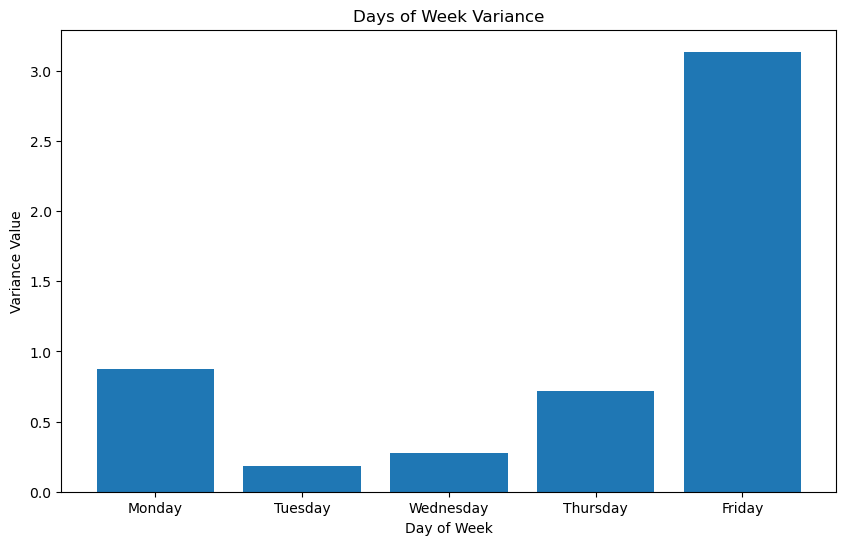

In [52]:
bar_chart(day_of_week_column,stock_prices_statistics['Variance'][0:5],'Days of Week Variance','Day of Week','Variance Value')

#### Standard Deviation of Stock Prices

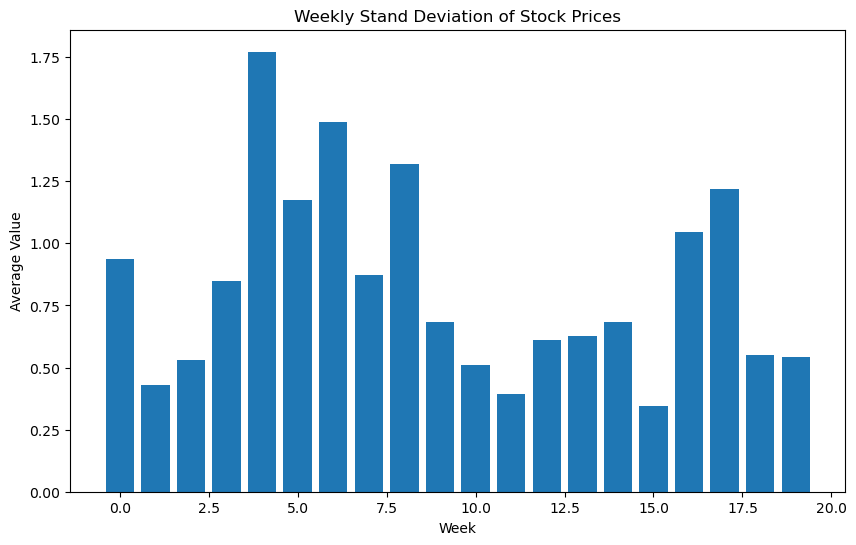

In [53]:
bar_chart(stock_prices_statistics.index[0:20],stock_prices_statistics['Standard Deviation'][0:20],'Weekly Stand Deviation of Stock Prices','Week','Average Value')

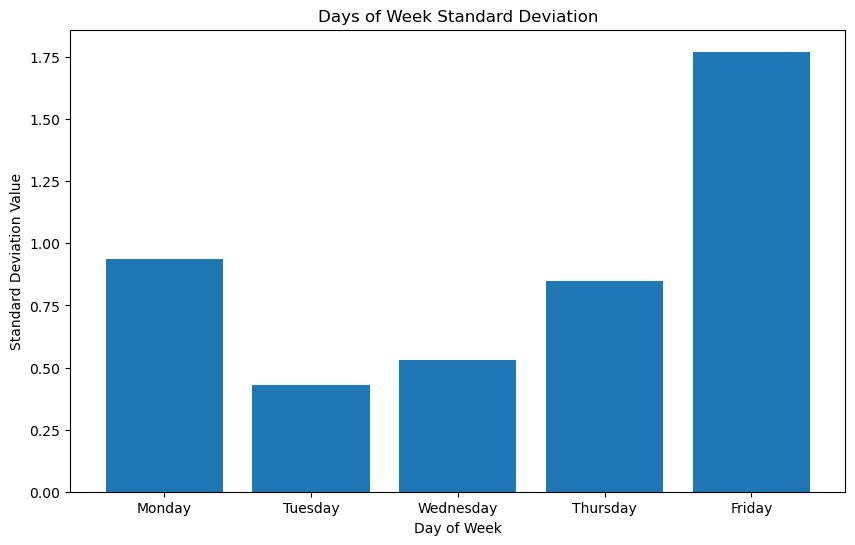

In [54]:
bar_chart(day_of_week_column,stock_prices_statistics['Standard Deviation'][0:5],'Days of Week Standard Deviation','Day of Week','Standard Deviation Value')

## Temperature Fluctuations

### Data Exploration

In [55]:
#Load in temperature fluctuations data
temperature_fluctuations = pd.read_excel('time_series_mixed_order.xlsx',sheet_name='Temperature Fluctuations')
temperature_fluctuations

,Unnamed: 0,Temperature Fluctuations
0,0,-0.369182
1,1,-0.608561
2,2,0.675689
3,3,1.542938
4,4,1.739233
...,...,...
95,95,1.006569
96,96,1.169455
97,97,1.216544
98,98,0.500300


In [56]:
#Preprocess temperature fluctuations
temperature_fluctuations['Incrementing Day'] = range(1, len(temperature_fluctuations)+1)
temperature_fluctuations['Day'] = pd.date_range('2024-01-01',periods=len(temperature_fluctuations))
temperature_fluctuations.drop(columns='Unnamed: 0',inplace=True)
temperature_fluctuations.set_index('Day',inplace=True)
temperature_fluctuations

,Temperature Fluctuations,Incrementing Day
Day,,
2024-01-01,-0.369182,1
2024-01-02,-0.608561,2
2024-01-03,0.675689,3
2024-01-04,1.542938,4
2024-01-05,1.739233,5
...,...,...
2024-04-05,1.006569,96
2024-04-06,1.169455,97
2024-04-07,1.216544,98


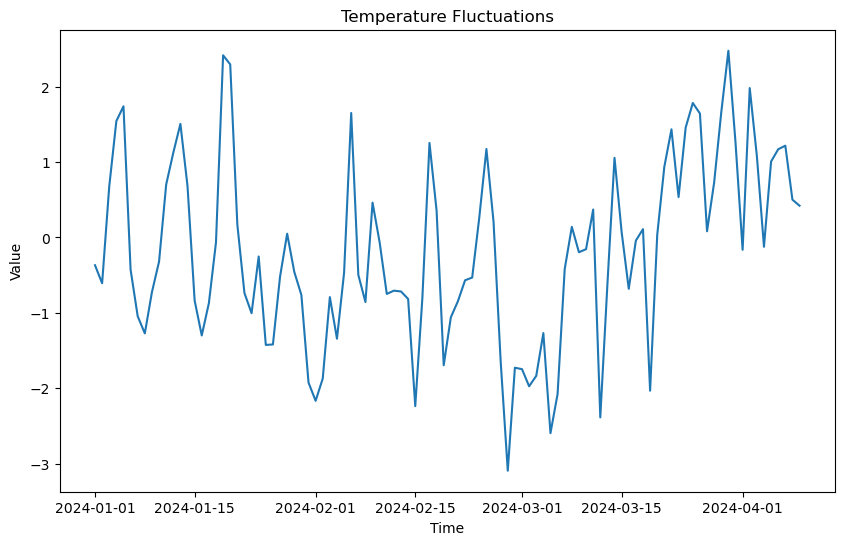

In [57]:
#Plot the time series
time_series(temperature_fluctuations.index,temperature_fluctuations['Temperature Fluctuations'],'Temperature Fluctuations','Time','Value')

#### Time interval choice

Temperature fluctuations are likely the daily temperatures over time. This is especially true as there is no clear overall pattern from looking at the graph, if it were weekly or monthly recordings you could expect to see a greater overall trend (likely upwards due to recent warmer temperatures across the globe)

In [58]:
#Daily temperature fluctuation data that has been decomposed
weekly_temperature_fluctuations_decomposition = seasonal_decompose(temperature_fluctuations['Temperature Fluctuations'],period=7)
weekly_temperature_fluctuations_decomposition_trend = weekly_temperature_fluctuations_decomposition.trend
weekly_temperature_fluctuations_decomposition_seasonal = weekly_temperature_fluctuations_decomposition.seasonal
weekly_temperature_fluctuations_decomposition_residual = weekly_temperature_fluctuations_decomposition.resid

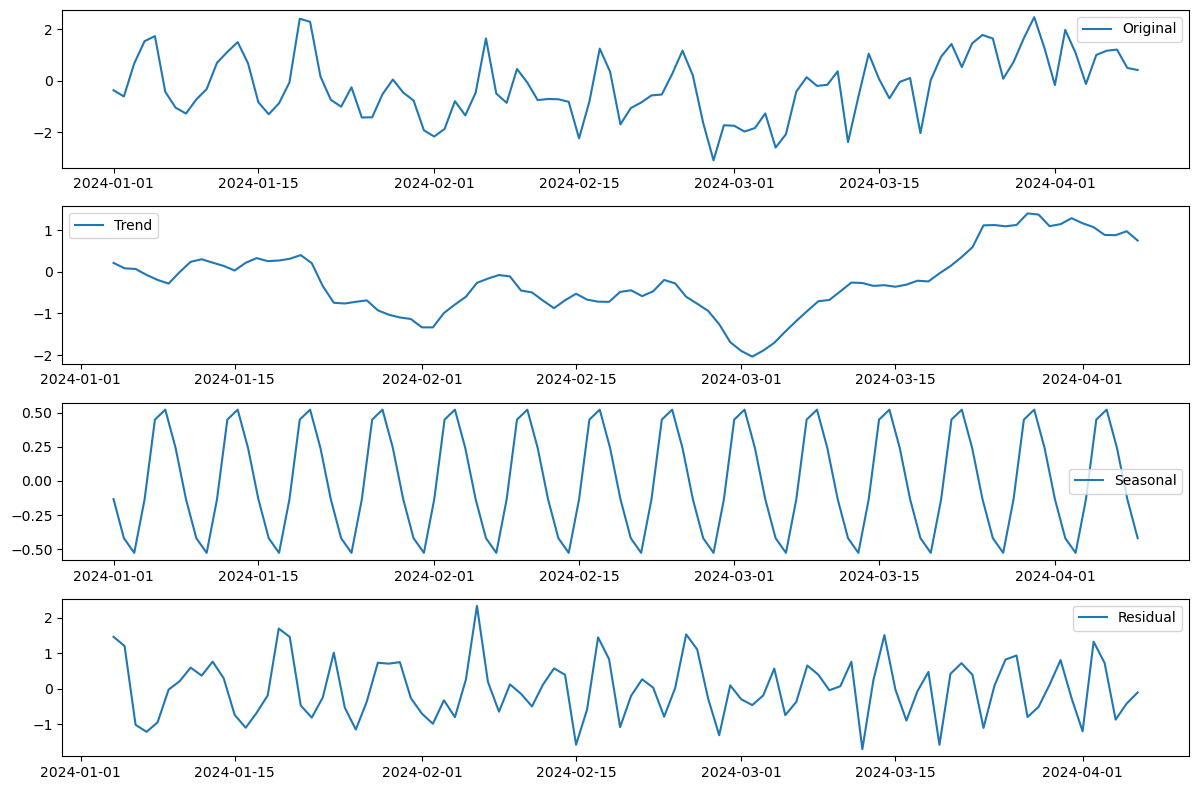

In [59]:
#Plot the temperature fluctuations seasonal decomposition
plot_seasonal_decomposition(temperature_fluctuations['Temperature Fluctuations'],7)

#### Weekly Seasonality Decomposition
Trend - The trend does not have any overall change in values

Cycles - There is a large dip in March of 2024 followed by an increase which remains constant as the data approaches April

Seasonal - There is a clear constant cycle which will be further explored

Text(0, 0.5, 'Seasonal Value')

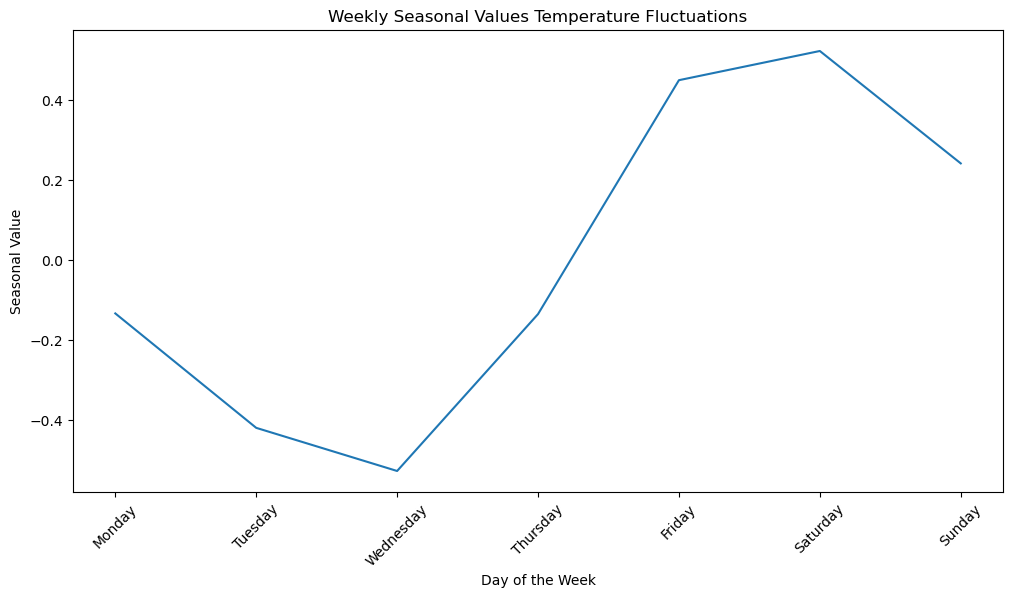

In [60]:
#Plot the seasonal values graph
weekly_temperature_fluctuations_seasonal = pd.DataFrame(weekly_temperature_fluctuations_decomposition_seasonal[0:7])
plt.figure(figsize=(12,6))
plt.plot(weekly_temperature_fluctuations_seasonal.index,weekly_temperature_fluctuations_seasonal['seasonal'])
plt.title('Weekly Seasonal Values Temperature Fluctuations')
plt.xlabel('Day of the Week')
plt.xticks(weekly_temperature_fluctuations_seasonal.index,['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xticks(rotation=45)
plt.ylabel('Seasonal Value')

#### Weekly Seasonal Values
The seasonal value graph displays a pattern of lower temperatures at the beginning of the week while temperatures increase to a local maximum on Saturday. This graph follows a sinusoidal pattern.

### Preliminary Analysis


In [61]:
#Create a new data frame that has weekly data
#This is going to make it easier to draw statistics from the data based on its seasonality
temperature_fluctuations_weekly=create_weekly_data(temperature_fluctuations,'Temperature Fluctuations','Incrementing Day')
temperature_fluctuations_weekly

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,-0.369182,-0.608561,0.675689,1.542938,1.739233,-0.427274,-1.046441
1,-1.273415,-0.725798,-0.321087,0.70056,1.122588,1.506231,0.67986
2,-0.837726,-1.301136,-0.872613,-0.065665,2.416052,2.295423,0.170638
3,-0.738635,-1.005904,-0.253269,-1.426691,-1.420482,-0.522103,0.049383
4,-0.456534,-0.764847,-1.925445,-2.168073,-1.873558,-0.79216,-1.344237
5,-0.469012,1.650578,-0.497454,-0.857461,0.461307,-0.068329,-0.750155
6,-0.706594,-0.717528,-0.816672,-2.238847,-0.805094,1.253238,0.353064
7,-1.696575,-1.060435,-0.845473,-0.568677,-0.53269,0.265529,1.173283
8,0.208419,-1.641953,-3.095597,-1.728888,-1.748114,-1.975303,-1.837374
9,-1.269411,-2.597269,-2.077996,-0.420718,0.140009,-0.196671,-0.156378


The same issue has arised as before where there are missing values for Wednesday-Sunday so let's find the average values for the first 13 weeks then implement them into week 14.

In [62]:
#Create a for loop that will go through the days that need to be replaced with the mean of the first 13 weeks
days_replace = ['Wednesday','Thursday','Friday','Saturday','Sunday']
for day in days_replace:
    replace_value = temperature_fluctuations_weekly[0:14][day].mean()
    temperature_fluctuations_weekly.loc[14,day] = replace_value
temperature_fluctuations_weekly

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,-0.369182,-0.608561,0.675689,1.542938,1.739233,-0.427274,-1.046441
1,-1.273415,-0.725798,-0.321087,0.70056,1.122588,1.506231,0.67986
2,-0.837726,-1.301136,-0.872613,-0.065665,2.416052,2.295423,0.170638
3,-0.738635,-1.005904,-0.253269,-1.426691,-1.420482,-0.522103,0.049383
4,-0.456534,-0.764847,-1.925445,-2.168073,-1.873558,-0.79216,-1.344237
5,-0.469012,1.650578,-0.497454,-0.857461,0.461307,-0.068329,-0.750155
6,-0.706594,-0.717528,-0.816672,-2.238847,-0.805094,1.253238,0.353064
7,-1.696575,-1.060435,-0.845473,-0.568677,-0.53269,0.265529,1.173283
8,0.208419,-1.641953,-3.095597,-1.728888,-1.748114,-1.975303,-1.837374
9,-1.269411,-2.597269,-2.077996,-0.420718,0.140009,-0.196671,-0.156378


In [63]:
#Create the statistical table using the function that has been used previously
temperature_fluctuations_statistics = mean_median_variance_std_weekly(temperature_fluctuations_weekly,days_column)
temperature_fluctuations_statistics

/var/folders/6q/lw13gkln44z1r6ncfrmcbc5w0000gn/T/ipykernel_85752/3543321098.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data.iloc[rows_to_select,columns_to_select] = pd.np.nan


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Weekly Mean,Weekly Median,Standard Deviation,Variance
0,-0.369182,-0.608561,0.675689,1.542938,1.739233,-0.427274,-1.046441,0.215200,-0.369182,1.104703,1.220368
1,-1.273415,-0.725798,-0.321087,0.70056,1.122588,1.506231,0.67986,0.241277,0.679860,1.026799,1.054315
2,-0.837726,-1.301136,-0.872613,-0.065665,2.416052,2.295423,0.170638,0.257854,-0.065665,1.518249,2.305080
3,-0.738635,-1.005904,-0.253269,-1.426691,-1.420482,-0.522103,0.049383,-0.759672,-0.738635,0.564226,0.318351
4,-0.456534,-0.764847,-1.925445,-2.168073,-1.873558,-0.79216,-1.344237,-1.332122,-1.344237,0.673815,0.454027
5,-0.469012,1.650578,-0.497454,-0.857461,0.461307,-0.068329,-0.750155,-0.075789,-0.469012,0.881956,0.777846
6,-0.706594,-0.717528,-0.816672,-2.238847,-0.805094,1.253238,0.353064,-0.525490,-0.717528,1.088115,1.183994
7,-1.696575,-1.060435,-0.845473,-0.568677,-0.53269,0.265529,1.173283,-0.466434,-0.568677,0.935329,0.874840
8,0.208419,-1.641953,-3.095597,-1.728888,-1.748114,-1.975303,-1.837374,-1.688401,-1.748114,0.973824,0.948332
9,-1.269411,-2.597269,-2.077996,-0.420718,0.140009,-0.196671,-0.156378,-0.939776,-0.420718,1.060877,1.125460


#### Weekly Average Temperature Fluctuations

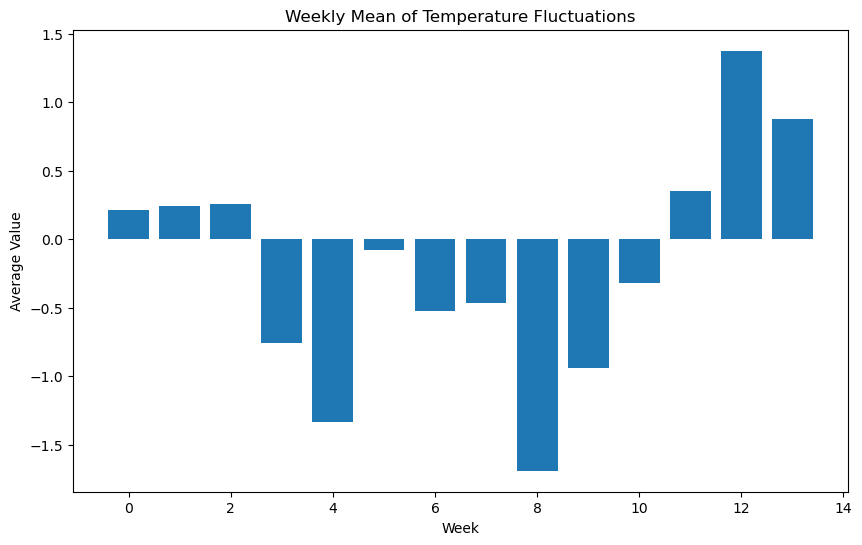

In [64]:
#Bar chart of weekly average temperature fluctuations
bar_chart(temperature_fluctuations_statistics.index[0:14],temperature_fluctuations_statistics['Weekly Mean'][0:14],'Weekly Mean of Temperature Fluctuations','Week','Average Value')

#### Weekly Median of Temperature Fluctuations

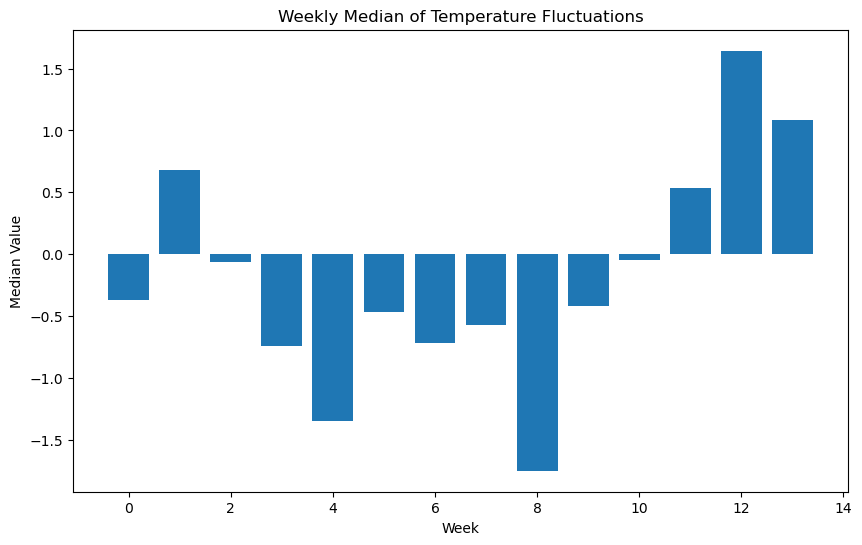

In [65]:
#Create a weekly median of temperature fluctuations graph
bar_chart(temperature_fluctuations_statistics.index[0:14],temperature_fluctuations_statistics['Weekly Median'][0:14],'Weekly Median of Temperature Fluctuations','Week','Median Value')

#### Variance of Temperature Fluctuations

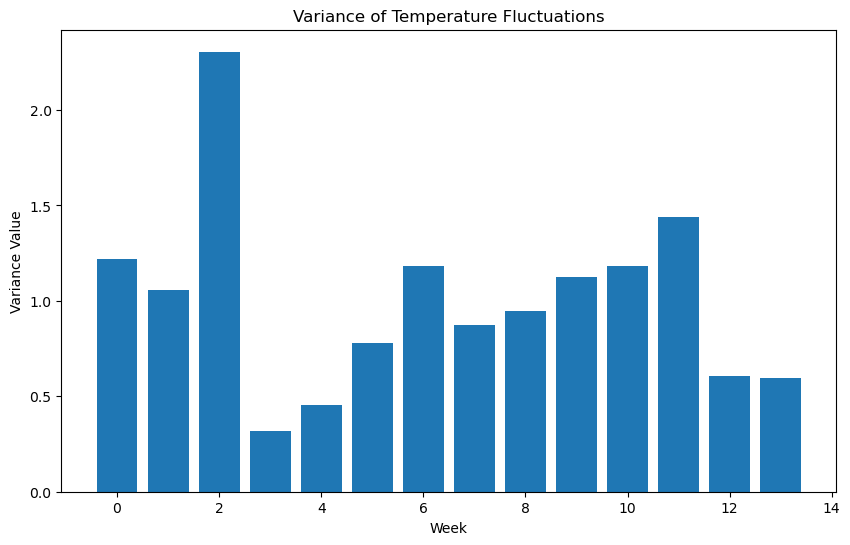

In [66]:
#Variance of incremental weeks
bar_chart(temperature_fluctuations_statistics.index[0:14],temperature_fluctuations_statistics['Variance'][0:14],'Variance of Temperature Fluctuations','Week','Variance Value')

#### Standard Deviation of Temperature Fluctuations

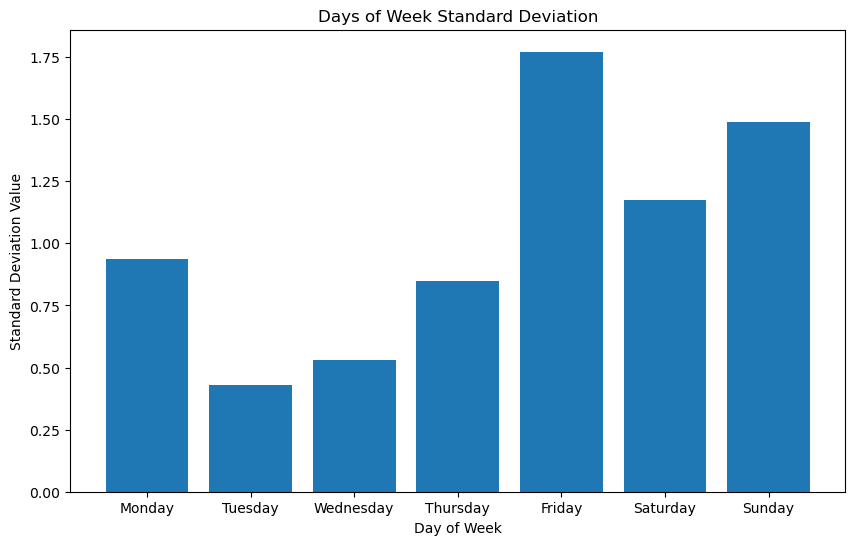

In [67]:
bar_chart(days_column,stock_prices_statistics['Standard Deviation'][0:7],'Days of Week Standard Deviation','Day of Week','Standard Deviation Value')

## Advertising Impact

### Data Exploration

In [68]:
#load in the advertising imapct data
advertising_impact = pd.read_excel('time_series_mixed_order.xlsx',sheet_name='Advertising Impact')
advertising_impact

,Unnamed: 0,Advertising Impact
0,0,-1.306527
1,1,-0.954923
2,2,-0.068220
3,3,-0.364128
4,4,-0.185789
...,...,...
95,95,-69.300932
96,96,-69.789283
97,97,-68.463394
98,98,-65.763320


In [69]:
#Preprocess the data
advertising_impact.drop(columns='Unnamed: 0',inplace=True)
advertising_impact['Incrementing Day'] = range(1, len(advertising_impact)+1)
advertising_impact['Day'] = pd.date_range('2024-01-01',periods=len(advertising_impact))
advertising_impact.set_index('Day',inplace=True)
advertising_impact

,Advertising Impact,Incrementing Day
Day,,
2024-01-01,-1.306527,1
2024-01-02,-0.954923,2
2024-01-03,-0.068220,3
2024-01-04,-0.364128,4
2024-01-05,-0.185789,5
...,...,...
2024-04-05,-69.300932,96
2024-04-06,-69.789283,97
2024-04-07,-68.463394,98


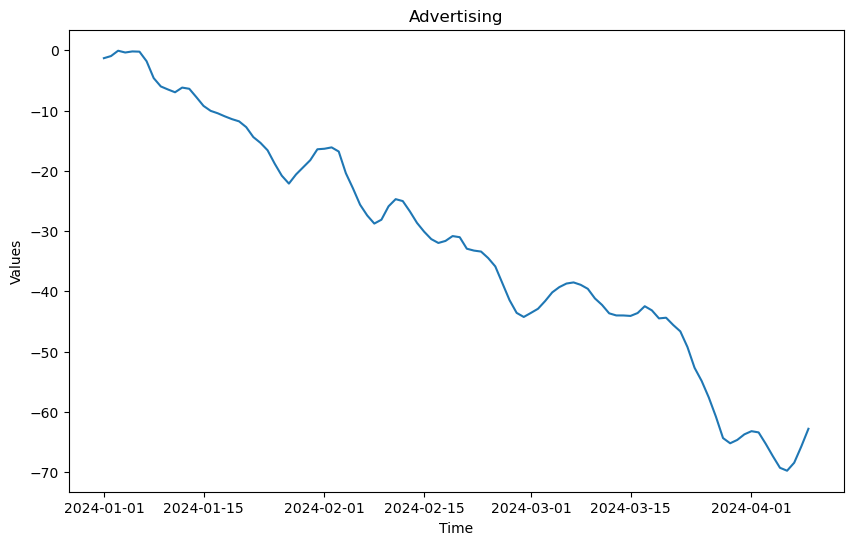

In [70]:
#Plot the time series
time_series(advertising_impact.index,advertising_impact['Advertising Impact'],'Advertising','Time','Values')

#### Time interval Choice
The impact of advertising is likely to be recorded on a daily basis. At large corporations there is daily spending of advertising and measuring its impact on a daily basis makes logical sense.

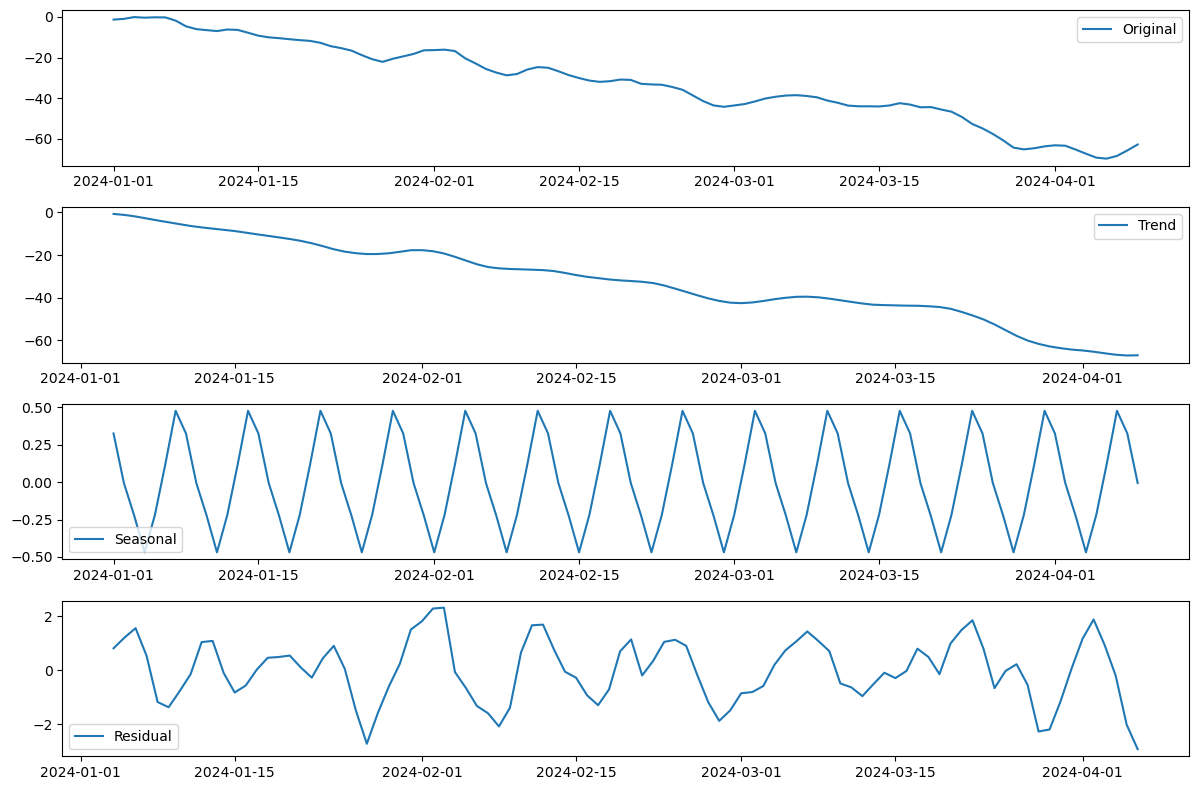

In [100]:
plot_seasonal_decomposition(advertising_impact['Advertising Impact'],7)

Trend - There is a very clear trend that seems to be almost completely linear once the seasonal movement has been taken out

Cycles - There are no cycles

Seasonality - There are spikes and troughs 

Residual - The residual value seems to have periods where there is prolonged peaks

### Preliminary Analysis

In [71]:
#Load in the sales data
sales_data = pd.read_excel('time_series_mixed_order.xlsx',sheet_name='Sales Data')
sales_data

,Unnamed: 0,Monthly Sales
0,0,-0.598654
1,1,-2.313205
2,2,-2.961766
3,3,-2.546422
4,4,-3.929142
...,...,...
115,115,-15.306840
116,116,-15.505981
117,117,-14.308235
118,118,-12.901095


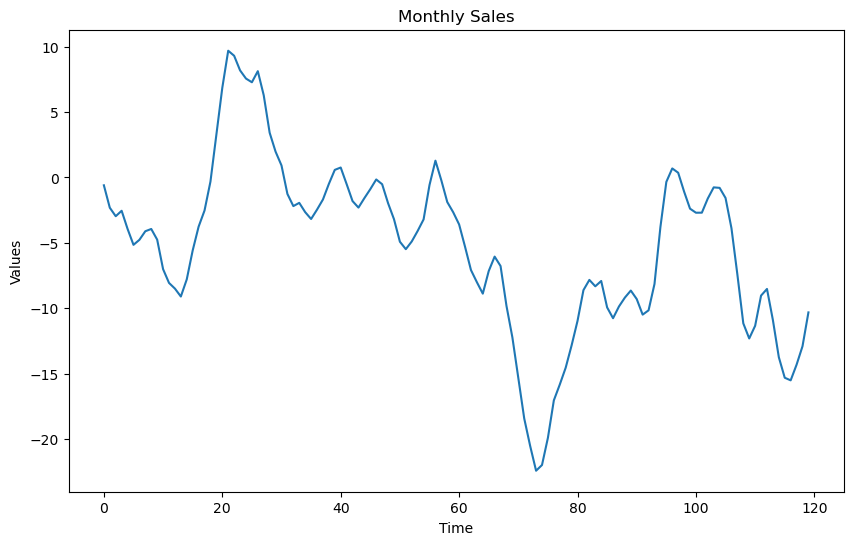

In [72]:
#Plot the time series
time_series(sales_data.index,sales_data['Monthly Sales'],'Monthly Sales','Time','Values')

In [73]:
#Load in the exchange rates
exchange_rate = pd.read_excel('time_series_mixed_order.xlsx',sheet_name='Exchange Rates')
exchange_rate

,Unnamed: 0,Exchange Rates,Economic Indicators
0,0,-0.201685,-0.222606
1,1,0.709373,-0.913079
2,2,1.004016,-1.681218
3,3,-0.841790,-0.888971
4,4,-2.238124,0.242118
...,...,...,...
115,115,1.510929,0.403265
116,116,1.478552,-0.918005
117,117,0.263802,0.252497
118,118,0.291200,0.820322


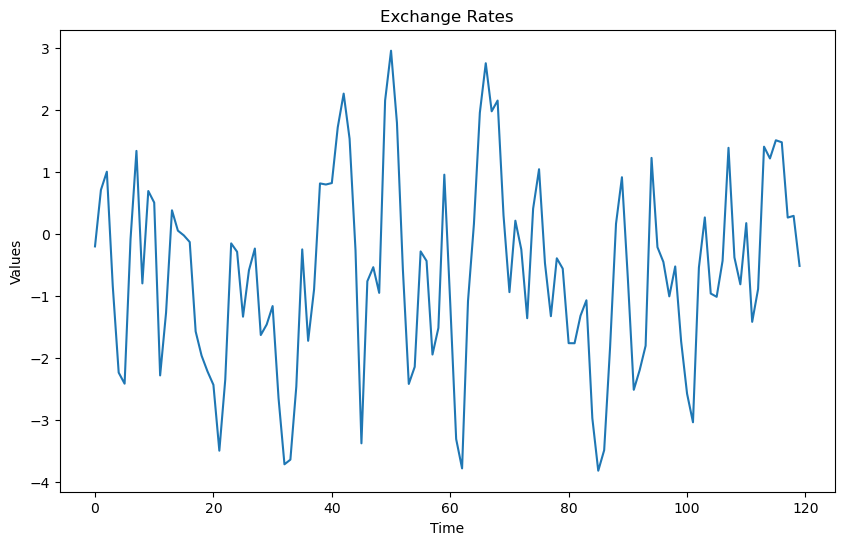

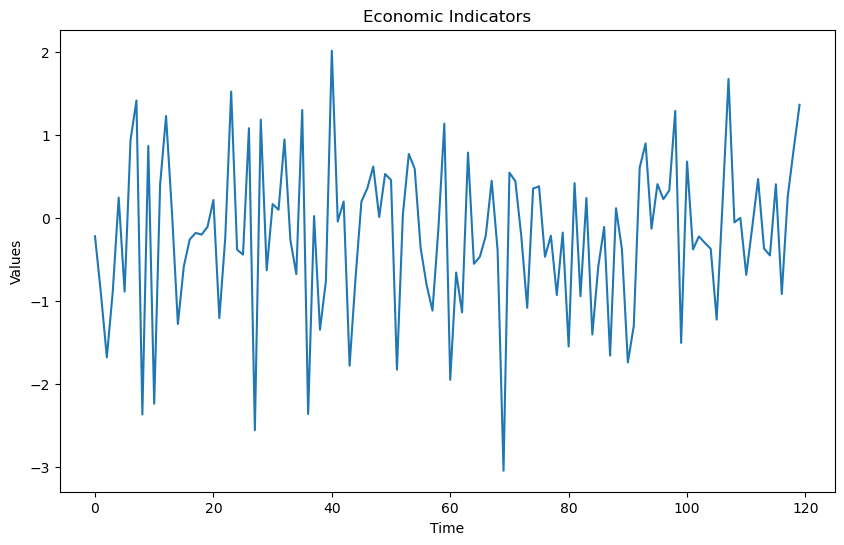

In [74]:
#Plot the time series
time_series(exchange_rate.index,exchange_rate['Exchange Rates'],'Exchange Rates','Time','Values')
time_series(exchange_rate.index,exchange_rate['Economic Indicators'],'Economic Indicators','Time','Values')